# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#데이터 읽기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(f'data set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')

# 데이터의 최상단 5 줄을 표시합니다.
train.head()

data set은 11 개의 feature를 가진 1015 개의 데이터 샘플로 이루어져 있습니다.


,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


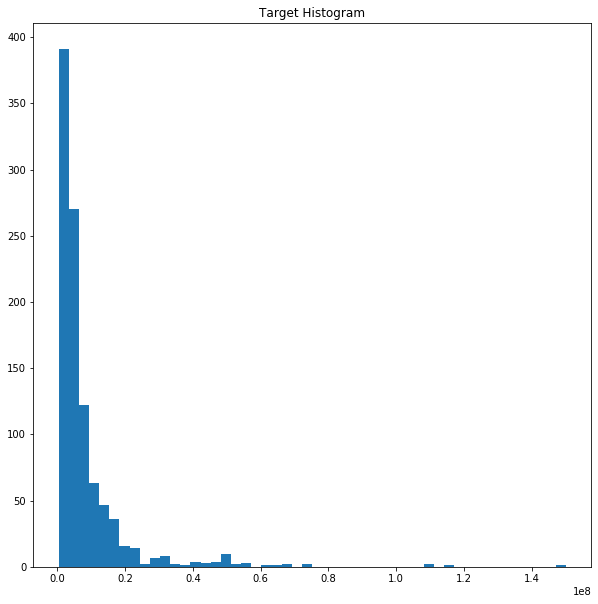

In [2]:
# target 분포 확인 -> 편차가 심함.
plt.figure(figsize=(10,10))
plt.hist(train['target'], bins=50)
plt.title('Target Histogram')
plt.show()

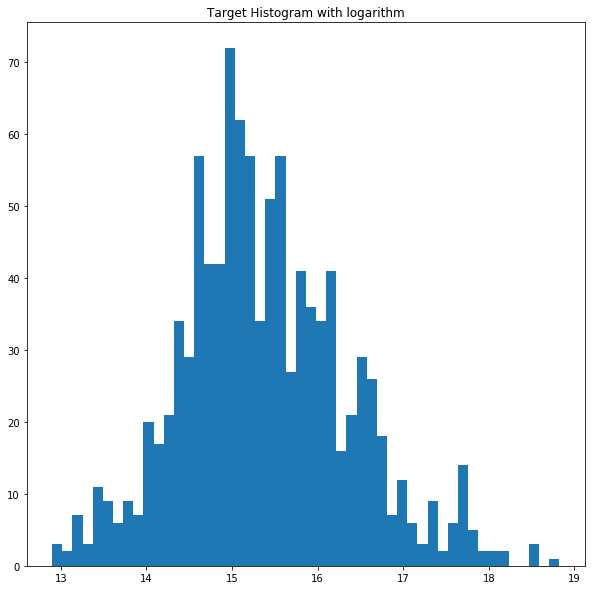

In [3]:
# 로그변환을 적용한 target 분포 확인 -> 정규분포와 가까운 모양
log_target = np.log(train['target'])

plt.figure(figsize=(10,10))
plt.hist(log_target, bins=50)
plt.title('Target Histogram with logarithm')
plt.show()

In [4]:
train[train['year'] < 1900]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
415,415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,4-cylinder(I4),manual,diesel,white,1218,6015000
827,827,Mercedes-Benz/52,510053,Lagos,Locally used,6-cylinder(V6),manual,diesel,white,1217,75015000


In [5]:
#이상값 삭제
train = train[train['year'] > 1900]
train.shape

(1013, 11)

In [6]:
train = train.drop('id', axis = 1).reset_index().drop('index', axis = 1).reset_index().rename({'index':'id'}, axis = 'columns')

In [7]:
#outlier 삭제
numeric_fts = ['odometer', 'year']
outlier_ind = []
for i in numeric_fts:
  Q1 = np.percentile(train[i],25)
  Q3 = np.percentile(train[i],75)
  IQR = Q3-Q1
  outlier_list = train[(train[i] < Q1 - IQR * 1.5) | (train[i] > Q3 + IQR * 1.5)].index
  outlier_ind.extend(outlier_list)

In [8]:
# Drop outliers
train = train.drop(outlier_ind, axis = 0).reset_index(drop = True)

In [9]:
train.shape

(975, 11)

In [10]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [11]:
#파생변수 brand 생성
train['title'].value_counts()[:20]

Toyota Camry            126
Toyota Corolla          108
Toyota Highlander        49
Toyota Sienna            46
Toyota RAV 4             40
Honda Accord             36
Lexus RX 350             33
Lexus ES 350             24
Lexus GX 460             16
Toyota Venza             16
Honda Pilot              15
Lexus LX 570             14
Toyota Avalon            13
Mercedes-Benz ML 350     13
Toyota 4-Runner          12
Toyota Tacoma            12
Mercedes-Benz E 350      12
Mercedes-Benz GL 450     12
Ford Explorer            12
Toyota Matrix            11
Name: title, dtype: int64

In [12]:
train['title'].apply(lambda x : x.split(" ")[0])

0             Toyota
1             Toyota
2               Land
3              Lexus
4             Toyota
5             Toyota
6               Land
7            Pontiac
8             Toyota
9              Lexus
10              Ford
11             Honda
12             Volvo
13             Lexus
14               BMW
15          Infiniti
16             Honda
17     Mercedes-Benz
18            Toyota
19           Hyundai
20             Lexus
21               BMW
22            Toyota
23            Toyota
24            Toyota
25             Honda
26            Toyota
27            Toyota
28             Honda
29             Honda
           ...      
945           Toyota
946    Mercedes-Benz
947    Mercedes-Benz
948            Lexus
949           Toyota
950            Lexus
951           Toyota
952       Volkswagen
953           Toyota
954           Toyota
955           Toyota
956             Land
957           Toyota
958           Toyota
959            Lexus
960            Lexus
961          

In [13]:
train['brand'] = train['title'].apply(lambda x : x.split(" ")[0])
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [14]:
train['brand'].value_counts()

Toyota            464
Lexus             121
Mercedes-Benz     102
Honda              78
Ford               34
Hyundai            23
Nissan             21
Land               19
Kia                14
Volkswagen         11
BMW                10
Acura               9
Mazda               8
Volvo               7
Infiniti            5
Chevrolet           5
Mitsubishi          4
GAC                 4
Porsche             4
Peugeot             3
Scania              3
Pontiac             3
Jaguar              3
Man                 2
Isuzu               2
DAF                 2
MINI                2
IVECO               1
JMC                 1
MAN-VOLKSWAGEN      1
ALPINA              1
Bentley             1
Rolls-Royce         1
Jeep                1
Iveco               1
IVM                 1
Mack                1
Lincoln             1
GMC                 1
Name: brand, dtype: int64

In [15]:
len(train['brand'].unique())

39

In [16]:
#test도 brand 추가
test['brand'] = test['title'].apply(lambda x : x.split(" ")[0])
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017,Mercedes-Benz
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013,Honda
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012,Mercedes-Benz
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001,Toyota
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000,Toyota


In [17]:
print(train['brand'].unique())
print("#fts :", len(train['brand'].unique()), '\n')
print(test['brand'].unique())
print("#fts :", len(test['brand'].unique()), '\n')

['Toyota' 'Land' 'Lexus' 'Pontiac' 'Ford' 'Honda' 'Volvo' 'BMW' 'Infiniti'
 'Mercedes-Benz' 'Hyundai' 'Jaguar' 'Mitsubishi' 'Nissan' 'Chevrolet'
 'Mazda' 'Lincoln' 'Kia' 'Acura' 'DAF' 'Man' 'Isuzu' 'IVM' 'Porsche'
 'MINI' 'GMC' 'Iveco' 'Scania' 'Volkswagen' 'GAC' 'IVECO' 'Mack' 'Peugeot'
 'Rolls-Royce' 'MAN-VOLKSWAGEN' 'Jeep' 'ALPINA' 'Bentley' 'JMC']
#fts : 39 

['Mercedes-Benz' 'Honda' 'Toyota' 'Iveco' 'Lexus' 'Nissan' 'Volkswagen'
 'Jeep' 'Ford' 'BMW' 'Mack' 'Land' 'Hyundai' 'Peugeot' 'Volvo' 'Infiniti'
 'Acura' 'Man' 'Fiat' 'MINI' 'DAF' 'Mazda' 'Porsche' 'Mitsubishi'
 'Chevrolet' 'Kia' 'Pontiac' 'Rolls-Royce']
#fts : 28 



In [18]:
brand_list = train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True)
brand_list = brand_list.reset_index(drop=True)

In [19]:
brand_list

,brand,target
0,GAC,1.490000e+06
1,Nissan,1.986667e+06
2,Mazda,2.078750e+06
3,Volkswagen,2.094091e+06
4,Peugeot,2.125000e+06
5,Jeep,2.515000e+06
6,Jaguar,2.665000e+06
7,Pontiac,2.715000e+06
8,Kia,2.817857e+06
9,IVM,2.890000e+06


In [20]:
#브랜드의 등급을 살리기 위해 따로 숫자를 준 다음에 Numeric 데이터로 학습할 것.
for i,br in enumerate(brand_list.brand):
    train = train.replace({
    br : 10*i,
    })
    
    test = test.replace({
    br : 10*i,
    'Fiat' : 0,
    })

In [21]:
train[['brand', 'target']].groupby(['brand'], as_index=False).mean().sort_values(by='target', ascending=True)

,brand,target
0,0,1.490000e+06
1,10,1.986667e+06
2,20,2.078750e+06
3,30,2.094091e+06
4,40,2.125000e+06
5,50,2.515000e+06
6,60,2.665000e+06
7,70,2.715000e+06
8,80,2.817857e+06
9,90,2.890000e+06


In [22]:
#train 또는 test 데이터세트에서 공통적으로 존재하지 않은 경우 가장 가까운 실린더 갯수로 통합
set(set(train.engine.unique()) | set(test.engine.unique())) - set(set(train.engine.unique()) & set(test.engine.unique()))

{'12-cylinder(V12)', '4-cylinder(H4)'}

In [23]:
train = train.replace({'4-cylinder(H4)' : '4-cylinder(I4)'})

In [24]:
test[test.engine == '12-cylinder(V12)']

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
142,142,Mercedes-Benz Maybach,6758,Lagos,New,12-cylinder(V12),automatic,petrol,Black,2019,310


In [25]:
test = test.replace({'12-cylinder(V12)' : '8-cylinder(V8)'})

In [26]:
print('------------- train -------------')
print(sorted(train.engine.unique()))

print('\n\n------------- test -------------')
print(sorted(test.engine.unique()))

------------- train -------------
['2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


------------- test -------------
['2-cylinder(I2)', '3-cylinder(I3)', '4-cylinder(I4)', '5-cylinder(I5)', '6-cylinder(I6)', '6-cylinder(V6)', '8-cylinder(V8)']


In [27]:
engine_re = train[['engine', 'target']].groupby(['engine'], as_index=False).mean().sort_values(by='target', ascending=False)
engine_re = engine_re.reset_index(drop=True)

In [28]:
engine_re

,engine,target
0,8-cylinder(V8),2.280010e+07
1,6-cylinder(I6),7.969522e+06
2,6-cylinder(V6),7.682515e+06
3,4-cylinder(I4),7.471240e+06
4,5-cylinder(I5),3.815000e+06
5,3-cylinder(I3),3.138333e+06
6,2-cylinder(I2),3.015000e+06


In [29]:
#엔진(실린더) 등급 살리기
train = train.replace({
    '2-cylinder(I2)' : 10,
    '3-cylinder(I3)' : 20,
    '5-cylinder(I5)' : 30,
    '4-cylinder(I4)' : 40,
    '6-cylinder(V6)' : 50,
    '6-cylinder(I6)' : 60,
    '8-cylinder(V8)' : 70
})

test = test.replace({
    '2-cylinder(I2)' : 10,
    '3-cylinder(I3)' : 20,
    '5-cylinder(I5)' : 30,
    '4-cylinder(I4)' : 40,
    '6-cylinder(V6)' : 50,
    '6-cylinder(I6)' : 60,
    '8-cylinder(V8)' : 70
})

In [30]:
print('------------- train -------------')
print(sorted(train.engine.unique()))

print('\n\n------------- test -------------')
print(sorted(test.engine.unique()))

------------- train -------------
[10, 20, 30, 40, 50, 60, 70]


------------- test -------------
[10, 20, 30, 40, 50, 60, 70]


In [31]:
#train의 paint 값 정제 시작
train['paint'].value_counts()[:20]

Black        287
White        114
Silver       101
Grey          82
Blue          69
Red           52
Dark Grey     44
Gold          36
Green         17
Gray          17
Brown         16
Black         15
white         15
Dark Blue     14
Wine           8
Silver         5
Sliver         4
Purple         3
blue           3
Ash            3
Name: paint, dtype: int64

In [32]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

In [33]:
temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp

In [34]:
print('paint의 unique 카테고리 개수 : ', len(train['paint'].unique()))

paint의 unique 카테고리 개수 :  49


In [35]:
train['paint'].value_counts()[:20]

black        305
white        132
silver       107
grey          84
blue          74
red           54
dark grey     45
gold          39
green         19
gray          18
dark blue     17
brown         16
wine           9
sliver         4
dark ash       4
cream          4
ash            3
purple         3
yellow         3
whiteblue      2
Name: paint, dtype: int64

In [36]:
#오타 수정 및 대표색상으로 바꾸기
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [37]:
train['paint'].value_counts()

black     307
grey      153
white     136
silver    114
blue      100
red        56
gold       39
green      20
brown      17
wine       10
ash         8
cream       4
purple      3
yellow      3
maroon      2
milk        2
beige       1
Name: paint, dtype: int64

In [38]:
print('paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

paint의 unique 카테고리 개수 :  17


In [39]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'maroon',
 'milk',
 'purple',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [40]:
#test의 paint도 값 정제
temp2 = clean_text(test['paint'])
test['paint'] = temp2
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].unique()))

test data에서 paint의 unique 카테고리 개수 :  30


In [41]:
sorted(test.paint.unique())

['ash',
 'beige',
 'blac',
 'black',
 'blue',
 'brown',
 'classic silver metf',
 'cream',
 'dark ash',
 'dark blue',
 'dark green',
 'dark grey',
 'gold',
 'golf',
 'gray',
 'green',
 'grey',
 'grey and black',
 'indigo ink pearl',
 'light grey',
 'maroon',
 'mint green',
 'navy blue',
 'red',
 'silver',
 'sliver',
 'white',
 'white and green',
 'wine',
 'yellow']

In [42]:
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [43]:
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

test data에서 paint의 unique 카테고리 개수 :  18


In [44]:
sorted(test.paint.unique())

['ash',
 'beige',
 'blac',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'golf',
 'green',
 'grey',
 'indigo ink pearl',
 'maroon',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [45]:
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('golf') == 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('blac') == 0 else x)

In [46]:
sorted(test.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'indigo ink pearl',
 'maroon',
 'red',
 'silver',
 'white',
 'wine',
 'yellow']

In [47]:
train = train.replace({
    'milk' : 'cream',
    'maroon' : 'red',
    'wine' : 'red',
})

test = test.replace({
    'indigo ink pearl' : 'blue',
    'golf' : 'green',
    'maroon' : 'red',
    'wine' : 'red',
})

In [48]:
print('train data에서 paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))
print('test data에서 paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

train data에서 paint의 unique 카테고리 개수 :  14
test data에서 paint의 unique 카테고리 개수 :  13


In [49]:
sorted(train.paint.unique())

['ash',
 'beige',
 'black',
 'blue',
 'brown',
 'cream',
 'gold',
 'green',
 'grey',
 'purple',
 'red',
 'silver',
 'white',
 'yellow']

In [50]:
#무채색 유채색 colum 만들기
train['colorType'] = train['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic
test['colorType'] = test['paint'].apply(lambda x:'chromatic' if x=='red' or x=='blue' or x=='brown' or x=='gold' or x=='green' or x=='orange' or x=='purple' or x=='yellow' else 'achromatic') #유채색 chromatic

In [51]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,40,automatic,petrol,red,2016,13665000,220,chromatic
1,1,Toyota Land Cruiser,10,Lagos,New,40,automatic,petrol,black,2019,33015000,220,achromatic
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,50,automatic,petrol,red,2012,9915000,370,chromatic
3,3,Lexus ES 350,91524,Lagos,Foreign Used,40,automatic,petrol,grey,2007,3815000,320,achromatic
4,4,Toyota Venza,94177,Lagos,Foreign Used,50,automatic,petrol,red,2010,7385000,220,chromatic


In [52]:
#가격 이상치 변경
train[(train.target > 100000000)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
323,341,Land Rover Range Rover Sport,18720,Lagos,Foreign Used,70,automatic,petrol,grey,2019,117015000,370,achromatic
547,568,Lexus LX 570,55530,Abuja,Foreign Used,70,automatic,petrol,black,2014,110015000,320,achromatic
575,596,Rolls-Royce Ghost,16069,Lagos,Locally used,40,automatic,petrol,black,2011,150015008,380,achromatic
705,735,Mercedes-Benz G 63 AMG,20,Lagos,New,70,automatic,petrol,black,2019,108690000,310,achromatic


In [53]:
train.loc[323,'target'] = 33015000
train.loc[547,'target'] = 29015000
train.loc[705,'target'] = 60015000

In [54]:
#location 값 정리(test,train 둘다 적용)
#location 칼럼 살펴보기
sorted(train.location.unique())

['Abia',
 'Abia State',
 'Abuja',
 'Abuja ',
 'Accra',
 'Adamawa ',
 'FCT',
 'Lagos',
 'Lagos ',
 'Lagos State',
 'Ogun',
 'Ogun State',
 'other']

In [55]:
sorted(test.location.unique())

['Abia',
 'Abuja',
 'Abuja ',
 'Arepo ogun state ',
 'Lagos',
 'Lagos ',
 'Lagos State',
 'Mushin',
 'Ogun',
 'Ogun State',
 'other']

In [56]:
#location 값 정제
train = train.replace({
    'Abia State' : 'Abia',
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun'
    })
test = test.replace({
    'Abuja ' : 'Abuja',
    'Lagos ' : 'Lagos',
    'Lagos State' : 'Lagos',
    'Ogun State' : 'Ogun',
    'Arepo ogun state ' : 'Ogun',
    'Mushin' : 'Lagos'
})

In [57]:
sorted(train.location.unique())

['Abia', 'Abuja', 'Accra', 'Adamawa ', 'FCT', 'Lagos', 'Ogun', 'other']

In [58]:
sorted(test.location.unique())

['Abia', 'Abuja', 'Lagos', 'Ogun', 'other']

In [59]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,40,automatic,petrol,red,2016,13665000,220,chromatic
1,1,Toyota Land Cruiser,10,Lagos,New,40,automatic,petrol,black,2019,33015000,220,achromatic
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,50,automatic,petrol,red,2012,9915000,370,chromatic
3,3,Lexus ES 350,91524,Lagos,Foreign Used,40,automatic,petrol,grey,2007,3815000,320,achromatic
4,4,Toyota Venza,94177,Lagos,Foreign Used,50,automatic,petrol,red,2010,7385000,220,chromatic


In [60]:
train_title10 = train[train['title'].apply(lambda x : x in train['title'].value_counts()[:10].keys())]
train_brand10 = train[train['brand'].apply(lambda x : x in train['brand'].value_counts()[:10].keys())]

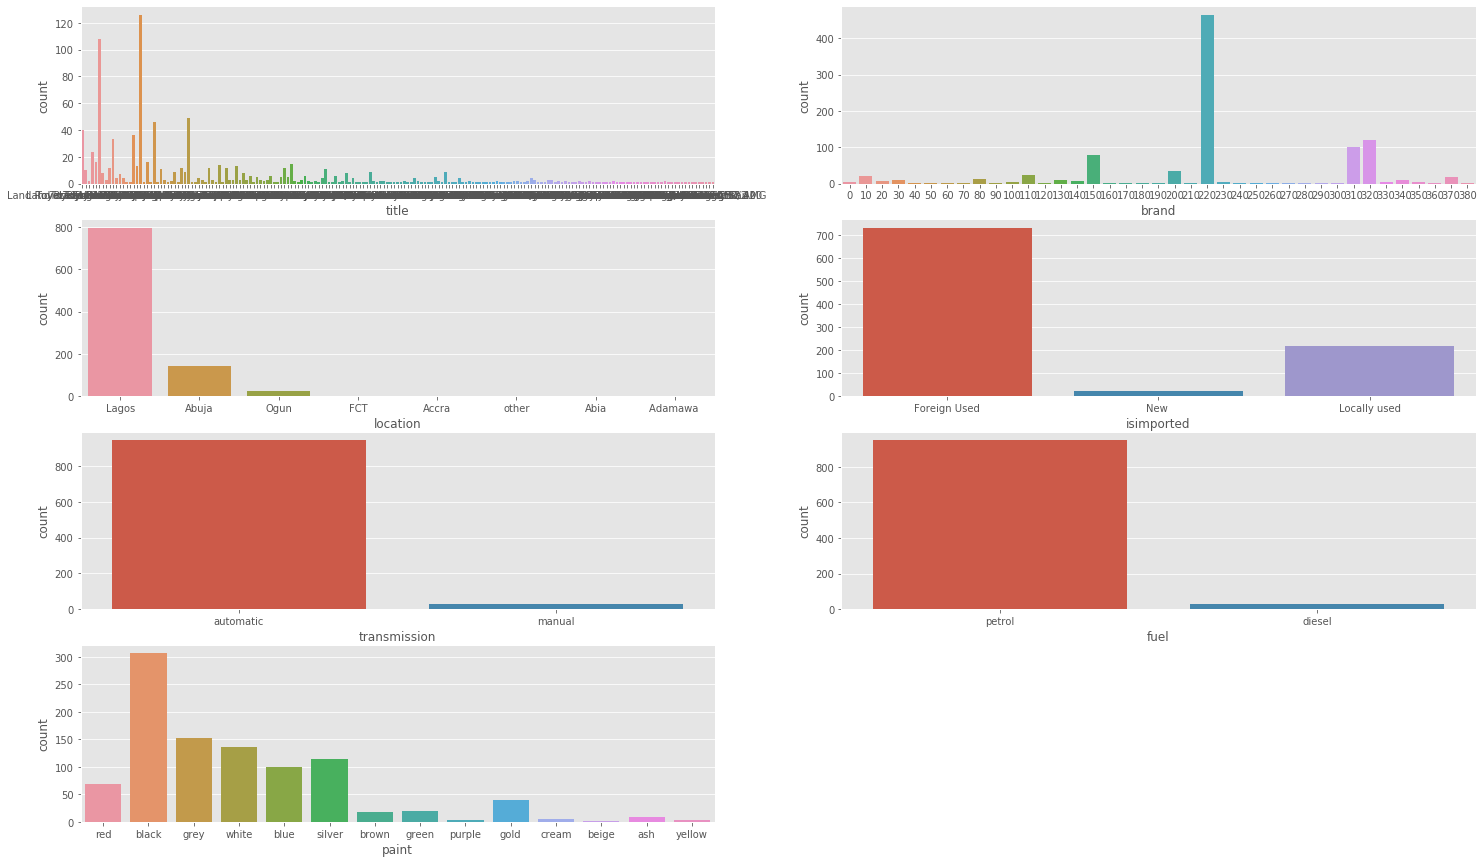

In [61]:
# feature들의 분포 확인 -> 몇몇 feature가 편향돼있는것을 확인할 수 있음.
# 이는 학습성능에 영향을 미칠것이라고 판단하여 편향 정도가 심한 피처 3가지(fuel,isimported,transmission)를 골라서 stratified k -fold에서 split 기준으로 
#사용하기로 하였다. 피처 3가지의 조합을 기준으로 삼기위해 라벨인코딩을 다음과 같이 진행하였다. (3가지의 조합->18가지)

plt.style.use("ggplot")

plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.countplot(data=train, x='title')
plt.subplot(4,2,2)
sns.countplot(data=train, x='brand')
count = 3

for i in train.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.countplot(data=train, x=i)
    count += 1

In [62]:
#라벨 인코딩

train_en = train.copy()
test_en = test.copy()

In [63]:
train_en.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,40,automatic,petrol,red,2016,13665000,220,chromatic
1,1,Toyota Land Cruiser,10,Lagos,New,40,automatic,petrol,black,2019,33015000,220,achromatic
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,50,automatic,petrol,red,2012,9915000,370,chromatic
3,3,Lexus ES 350,91524,Lagos,Foreign Used,40,automatic,petrol,grey,2007,3815000,320,achromatic
4,4,Toyota Venza,94177,Lagos,Foreign Used,50,automatic,petrol,red,2010,7385000,220,chromatic


In [64]:
# 라벨 인코딩(title)
# train, test 데이터에 있는 모든 car title 합치기
car_title = pd.concat([train.title, test.title], ignore_index = True)
car_title = set(car_title)
car_title

{'ALPINA B3',
 'Acura MDX',
 'Acura RDX',
 'Acura TL',
 'Acura TSX',
 'Acura ZDX',
 'BMW 325',
 'BMW 335',
 'BMW 525',
 'BMW 528',
 'BMW 535',
 'BMW 730',
 'BMW 740',
 'BMW 745',
 'BMW 750',
 'BMW X3',
 'BMW X6',
 'Bentley Arnage',
 'Chevrolet Camaro',
 'Chevrolet Evanda',
 'Chevrolet Traverse',
 'DAF 95XF TRACTOR HEAD',
 'DAF CF',
 'DAF XF TRACTOR HEAD',
 'Fiat Ducato',
 'Ford Edge',
 'Ford Escape',
 'Ford Expedition',
 'Ford Explorer',
 'Ford F 150',
 'Ford Focus',
 'Ford Fusion',
 'Ford Mondeo',
 'Ford Mustang',
 'Ford TRANSIT PICKUP',
 'Ford Transit',
 'GAC Gonow Other',
 'GMC Terrain',
 'Honda Accord',
 'Honda CR-V',
 'Honda Civic',
 'Honda Crosstour',
 'Honda Element',
 'Honda Fit',
 'Honda Insight',
 'Honda Odyssey',
 'Honda Pilot',
 'Honda Ridgeline',
 'Hyundai Azera',
 'Hyundai Elantra',
 'Hyundai Santa Fe',
 'Hyundai Sonata',
 'Hyundai Tucson',
 'Hyundai ix35',
 'IVECO EUROTECH 7.50E-16',
 'IVM LT35',
 'Infiniti FX',
 'Infiniti JX',
 'Infiniti M35',
 'Infiniti QX80',
 'Isuzu 

In [65]:
# label 생성을 위한 dictionary 생성
car_title_label = {car_title : label for label, car_title in enumerate(car_title)}
car_title_label

{'Mitsubishi Galant': 0,
 'Mazda Tribute': 1,
 'Mercedes-Benz ML 320': 2,
 'Toyota Tacoma': 3,
 'Mercedes-Benz S 450': 4,
 'Nissan Frontier': 5,
 'Mercedes-Benz 350': 6,
 'Porsche Macan': 7,
 'Man 26-403': 8,
 'Lexus RX 400': 9,
 'Toyota Corolla': 10,
 'Nissan Sentra': 11,
 'Infiniti M35': 12,
 'Toyota Sequoia': 13,
 'Chevrolet Traverse': 14,
 'DAF 95XF TRACTOR HEAD': 15,
 'Honda Insight': 16,
 'Volkswagen 17.22': 17,
 'Mitsubishi Montero': 18,
 'Lexus LX 570': 19,
 'BMW 528': 20,
 'Mercedes-Benz C 450 AMG': 21,
 'Mazda 323': 22,
 'Toyota Sienna': 23,
 'Toyota Solara': 24,
 'Mercedes-Benz E 200': 25,
 'Nissan Rogue': 26,
 'Mercedes-Benz 200': 27,
 'Rolls-Royce Ghost': 28,
 'ALPINA B3': 29,
 'Nissan Altima': 30,
 'BMW 730': 31,
 'BMW 535': 32,
 'Infiniti FX': 33,
 'Mazda 6': 34,
 'BMW 750': 35,
 'Honda Civic': 36,
 'Toyota Camry': 37,
 'Volkswagen T6 other': 38,
 'Honda Fit': 39,
 'Honda Crosstour': 40,
 'Scania TRACTOR HEAD': 41,
 'Honda Odyssey': 42,
 'Man LE 8. 180 PLATFORM TRUCK': 4

In [66]:
# 생성된 dictionary를 이용하여 car title labeling
train_en['title'] = train['title'].replace(car_title_label)
test_en['title'] = test['title'].replace(car_title_label)

In [67]:
# 라벨 인코딩(location)
train.location.unique()

array(['Lagos', 'Abuja', 'Ogun', 'FCT', 'Accra', 'other', 'Abia',
       'Adamawa '], dtype=object)

In [68]:
test.location.unique()

array(['Abuja', 'Lagos', 'Ogun', 'other', 'Abia'], dtype=object)

In [69]:
#train data와 test data에 공통적으로 존재하는 값을 제외하고 other로 통합하기
# 합집합( '|' ) - 교집합( '&' )
set(set(train.location.unique()) | set(test.location.unique())) - set(set(train.location.unique()) & set(test.location.unique()))

{'Accra', 'Adamawa ', 'FCT'}

In [70]:
train['location'] = train['location'].replace({
    'Accra' : 'other',
    'Adamawa ' : 'other',
    'FCT' : 'other',
    'Mushin' : 'other'
})

train.location.unique()

array(['Lagos', 'Abuja', 'Ogun', 'other', 'Abia'], dtype=object)

In [71]:
test['location'] = test['location'].replace({
    'Accra' : 'other',
    'Adamawa ' : 'other',
    'FCT' : 'other',
    'Mushin' : 'other'
})

test.location.unique()

array(['Abuja', 'Lagos', 'Ogun', 'other', 'Abia'], dtype=object)

In [72]:
location_label = {location : label for label, location in enumerate(train.location.unique())}
location_label

{'Lagos': 0, 'Abuja': 1, 'Ogun': 2, 'other': 3, 'Abia': 4}

In [73]:
train_en['location'] = train['location'].replace(location_label)
test_en['location'] = test['location'].replace(location_label)

In [74]:
# 라벨 인코딩(paint)
train.paint.unique()

array(['red', 'black', 'grey', 'white', 'blue', 'silver', 'brown',
       'green', 'purple', 'gold', 'cream', 'beige', 'ash', 'yellow'],
      dtype=object)

In [75]:
test.paint.unique()

array(['white', 'black', 'grey', 'red', 'silver', 'blue', 'gold', 'green',
       'cream', 'brown', 'yellow', 'ash', 'beige'], dtype=object)

In [76]:
paint_label = {_paint : label for label, _paint in enumerate(set(pd.concat([train.paint, test.paint])))}
paint_label

{'black': 0,
 'blue': 1,
 'ash': 2,
 'gold': 3,
 'white': 4,
 'brown': 5,
 'grey': 6,
 'green': 7,
 'cream': 8,
 'purple': 9,
 'red': 10,
 'yellow': 11,
 'silver': 12,
 'beige': 13}

In [77]:
train_en['paint'] = train['paint'].replace(paint_label)
test_en['paint'] = test['paint'].replace(paint_label)

In [78]:
test_en.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
0,0,52,1234,1,New,40,automatic,petrol,4,2017,310,achromatic
1,1,77,29938,1,Foreign Used,40,automatic,petrol,4,2013,150,achromatic
2,2,162,87501,0,Foreign Used,40,automatic,petrol,0,2012,310,achromatic
3,3,23,180894,0,Locally used,50,automatic,petrol,6,2001,220,achromatic
4,4,220,104814,0,Foreign Used,40,automatic,petrol,4,2000,220,achromatic


In [79]:
#비정상적인 year column의 변수 변경
test[(test.year == 1324) | (test.year == 1726) | (test.year == 2626)]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
304,304,Mercedes-Benz CABIN PLUS CHASSIS ONLY,650923,Lagos,Locally used,50,manual,diesel,blue,1324,310,chromatic
406,406,Mercedes-Benz DUMP TRUCK,0,Lagos,Locally used,70,manual,diesel,white,2626,310,achromatic
411,411,Mercedes-Benz WATER TANKER,701934,Lagos,Locally used,70,manual,diesel,white,1726,310,achromatic


In [80]:
test_en['year'] = test_en['year'].replace([1324, 1726, 2626], [2010, 2010, 2020])

In [81]:
test_en.iloc[[304, 406, 411]]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
304,304,172,650923,0,Locally used,50,manual,diesel,1,2010,310,chromatic
406,406,144,0,0,Locally used,70,manual,diesel,4,2020,310,achromatic
411,411,86,701934,0,Locally used,70,manual,diesel,4,2010,310,achromatic


In [82]:
#편향된 피처들의 조합으로 stratified k fold 하기 위해 
isimported_label = {'Foreign Used': 100, 'Locally used' : 200, 'New ' : 300}
transmission_label = {'automatic' : 10, 'manual' : 20}
fuel_label = {'petrol' : 1, 'diesel' : 2}

In [83]:
train_en['isimported'] = train_en['isimported'].replace(isimported_label)
test_en['isimported'] = test_en['isimported'].replace(isimported_label)

train_en['transmission'] = train_en['transmission'].replace(transmission_label)
test_en['transmission'] = test_en['transmission'].replace(transmission_label)

train_en['fuel'] = train_en['fuel'].replace(fuel_label)
test_en['fuel'] = test_en['fuel'].replace(fuel_label)

In [84]:
train_en.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,0,73,18277,0,100,40,10,1,10,2016,13665000,220,chromatic
1,1,177,10,0,300,40,10,1,0,2019,33015000,220,achromatic
2,2,186,83091,0,100,50,10,1,10,2012,9915000,370,chromatic
3,3,51,91524,0,100,40,10,1,6,2007,3815000,320,achromatic
4,4,59,94177,0,100,50,10,1,10,2010,7385000,220,chromatic


In [85]:
test_en.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
0,0,52,1234,1,300,40,10,1,4,2017,310,achromatic
1,1,77,29938,1,100,40,10,1,4,2013,150,achromatic
2,2,162,87501,0,100,40,10,1,0,2012,310,achromatic
3,3,23,180894,0,200,50,10,1,6,2001,220,achromatic
4,4,220,104814,0,100,40,10,1,4,2000,220,achromatic


In [86]:
# 라벨 인코딩(colorType)
color_type_label = {'achromatic' : 0, 'chromatic' : 1}

In [87]:
train_en['colorType'] = train_en['colorType'].replace(color_type_label)
test_en['colorType'] = test_en['colorType'].replace(color_type_label)

In [88]:
train_en.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType
0,0,73,18277,0,100,40,10,1,10,2016,13665000,220,1
1,1,177,10,0,300,40,10,1,0,2019,33015000,220,0
2,2,186,83091,0,100,50,10,1,10,2012,9915000,370,1
3,3,51,91524,0,100,40,10,1,6,2007,3815000,320,0
4,4,59,94177,0,100,50,10,1,10,2010,7385000,220,1


In [89]:
#stratified-k-fold의 split 기준으로 사용할 칼럼 생성
feature_sum = train_en['transmission']+train_en['fuel']+train_en['isimported']

In [90]:
train_en["sum"] = feature_sum
train_en.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType,sum
0,0,73,18277,0,100,40,10,1,10,2016,13665000,220,1,111
1,1,177,10,0,300,40,10,1,0,2019,33015000,220,0,311
2,2,186,83091,0,100,50,10,1,10,2012,9915000,370,1,111
3,3,51,91524,0,100,40,10,1,6,2007,3815000,320,0,111
4,4,59,94177,0,100,50,10,1,10,2010,7385000,220,1,111


In [91]:
test_en.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
0,0,52,1234,1,300,40,10,1,4,2017,310,0
1,1,77,29938,1,100,40,10,1,4,2013,150,0
2,2,162,87501,0,100,40,10,1,0,2012,310,0
3,3,23,180894,0,200,50,10,1,6,2001,220,0
4,4,220,104814,0,100,40,10,1,4,2000,220,0


In [92]:
#target값 log 변경
log_df = train_en.copy()
log_df['target'] = np.log(log_df['target'])
log_df.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand,colorType,sum
0,0,73,18277,0,100,40,10,1,10,2016,16.430348,220,1,111
1,1,177,10,0,300,40,10,1,0,2019,17.312473,220,0,311
2,2,186,83091,0,100,50,10,1,10,2012,16.109559,370,1,111
3,3,51,91524,0,100,40,10,1,6,2007,15.154451,320,0,111
4,4,59,94177,0,100,50,10,1,10,2010,15.814961,220,1,111


In [93]:
data_train_X = log_df.drop(columns = ['target','id'],axis = 1)
data_train_X.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType,sum
0,73,18277,0,100,40,10,1,10,2016,220,1,111
1,177,10,0,300,40,10,1,0,2019,220,0,311
2,186,83091,0,100,50,10,1,10,2012,370,1,111
3,51,91524,0,100,40,10,1,6,2007,320,0,111
4,59,94177,0,100,50,10,1,10,2010,220,1,111


In [94]:
data_train_y = log_df['target']
data_train_y.head()

0    16.430348
1    17.312473
2    16.109559
3    15.154451
4    15.814961
Name: target, dtype: float64

In [95]:
data_test = test_en.copy()

In [96]:
data_test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
0,0,52,1234,1,300,40,10,1,4,2017,310,0
1,1,77,29938,1,100,40,10,1,4,2013,150,0
2,2,162,87501,0,100,40,10,1,0,2012,310,0
3,3,23,180894,0,200,50,10,1,6,2001,220,0
4,4,220,104814,0,100,40,10,1,4,2000,220,0


In [97]:
data_test = data_test.drop(columns = ['id'],axis = 1)
data_test.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand,colorType
0,52,1234,1,300,40,10,1,4,2017,310,0
1,77,29938,1,100,40,10,1,4,2013,150,0
2,162,87501,0,100,40,10,1,0,2012,310,0
3,23,180894,0,200,50,10,1,6,2001,220,0
4,220,104814,0,100,40,10,1,4,2000,220,0


# 하이퍼파라미터 찾기

In [101]:
#최적화 하이퍼 파라미터 확인을 위한 GreadSearchCV 라이브러리 import

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#RandomForestRegressor 모델의 최적 하이퍼 파라미터 확인을 위한 범위 설정
cv_rft = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
#범위 안의 하이퍼파라미터들을 조합해 학습
CV_rfc = GridSearchCV(RandomForestRegressor(), param_grid=cv_rft, cv= 5)
CV_rfc.fit(data_train_X, data_train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500]})

In [102]:
#최적 하이퍼 파라미터 확인
print(CV_rfc.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [106]:
#CatBoostRegressor 모델의 최적 하이퍼 파라미터 확인을 위한 범위 설정
cv_cb = {'depth' : [4,5,6,7,8,9, 10],
         'learning_rate' : [0.01,0.02,0.03,0.04],
         'iterations'    : [10]
}
#범위 안의 하이퍼파라미터들을 조합해 학습
cv_cb = GridSearchCV(CatBoostRegressor(), param_grid=cv_cb, cv=5)
cv_cb.fit(data_train_X, data_train_y)

0:	learn: 0.9811057	total: 930us	remaining: 8.37ms
1:	learn: 0.9750757	total: 1.91ms	remaining: 7.65ms
2:	learn: 0.9691488	total: 2.88ms	remaining: 6.71ms
3:	learn: 0.9630549	total: 3.88ms	remaining: 5.82ms
4:	learn: 0.9574168	total: 4.7ms	remaining: 4.7ms
5:	learn: 0.9522699	total: 5.63ms	remaining: 3.75ms
6:	learn: 0.9467274	total: 6.57ms	remaining: 2.82ms
7:	learn: 0.9410218	total: 7.32ms	remaining: 1.83ms
8:	learn: 0.9355720	total: 8.26ms	remaining: 917us
9:	learn: 0.9301957	total: 9.14ms	remaining: 0us
0:	learn: 0.9638556	total: 618us	remaining: 5.57ms
1:	learn: 0.9578946	total: 1.3ms	remaining: 5.21ms
2:	learn: 0.9520521	total: 2.08ms	remaining: 4.85ms
3:	learn: 0.9460225	total: 2.9ms	remaining: 4.35ms
4:	learn: 0.9401871	total: 3.74ms	remaining: 3.74ms
5:	learn: 0.9352656	total: 4.82ms	remaining: 3.21ms
6:	learn: 0.9295859	total: 5.58ms	remaining: 2.39ms
7:	learn: 0.9237968	total: 6.47ms	remaining: 1.62ms
8:	learn: 0.9183386	total: 7.35ms	remaining: 816us
9:	learn: 0.9129681	tot

0:	learn: 0.9275841	total: 1.47ms	remaining: 13.2ms
1:	learn: 0.9058800	total: 2.68ms	remaining: 10.7ms
2:	learn: 0.8846075	total: 3.57ms	remaining: 8.32ms
3:	learn: 0.8633811	total: 4.53ms	remaining: 6.79ms
4:	learn: 0.8445224	total: 5.42ms	remaining: 5.42ms
5:	learn: 0.8284365	total: 6.3ms	remaining: 4.2ms
6:	learn: 0.8095026	total: 7.37ms	remaining: 3.16ms
7:	learn: 0.7922513	total: 8.4ms	remaining: 2.1ms
8:	learn: 0.7760566	total: 9.56ms	remaining: 1.06ms
9:	learn: 0.7607597	total: 10.7ms	remaining: 0us
0:	learn: 0.9452508	total: 3.56ms	remaining: 32ms
1:	learn: 0.9225877	total: 6.61ms	remaining: 26.4ms
2:	learn: 0.9008836	total: 10.2ms	remaining: 23.7ms
3:	learn: 0.8787979	total: 12.2ms	remaining: 18.3ms
4:	learn: 0.8593950	total: 14.3ms	remaining: 14.3ms
5:	learn: 0.8431179	total: 16ms	remaining: 10.6ms
6:	learn: 0.8251601	total: 17.3ms	remaining: 7.42ms
7:	learn: 0.8069711	total: 18.9ms	remaining: 4.72ms
8:	learn: 0.7902504	total: 20.6ms	remaining: 2.29ms
9:	learn: 0.7742802	tot

0:	learn: 0.9445386	total: 31.7ms	remaining: 286ms
1:	learn: 0.9228388	total: 32.7ms	remaining: 131ms
2:	learn: 0.9014890	total: 33.7ms	remaining: 78.7ms
3:	learn: 0.8805965	total: 34.7ms	remaining: 52ms
4:	learn: 0.8593024	total: 35.7ms	remaining: 35.7ms
5:	learn: 0.8387634	total: 36.9ms	remaining: 24.6ms
6:	learn: 0.8204104	total: 38.1ms	remaining: 16.3ms
7:	learn: 0.8026569	total: 39.5ms	remaining: 9.87ms
8:	learn: 0.7861237	total: 40.7ms	remaining: 4.52ms
9:	learn: 0.7701515	total: 41.8ms	remaining: 0us
0:	learn: 0.9164612	total: 911us	remaining: 8.2ms
1:	learn: 0.8972363	total: 2.01ms	remaining: 8.04ms
2:	learn: 0.8756012	total: 3.11ms	remaining: 7.27ms
3:	learn: 0.8558475	total: 4.62ms	remaining: 6.93ms
4:	learn: 0.8358776	total: 5.92ms	remaining: 5.92ms
5:	learn: 0.8148914	total: 7.02ms	remaining: 4.68ms
6:	learn: 0.7980702	total: 8.28ms	remaining: 3.55ms
7:	learn: 0.7814323	total: 9.76ms	remaining: 2.44ms
8:	learn: 0.7646079	total: 11.3ms	remaining: 1.26ms
9:	learn: 0.7489708	t

0:	learn: 0.9335289	total: 16.9ms	remaining: 152ms
1:	learn: 0.9161815	total: 20.1ms	remaining: 80.6ms
2:	learn: 0.8980190	total: 22.8ms	remaining: 53.3ms
3:	learn: 0.8801030	total: 25.5ms	remaining: 38.3ms
4:	learn: 0.8649539	total: 28.5ms	remaining: 28.5ms
5:	learn: 0.8513941	total: 31.4ms	remaining: 20.9ms
6:	learn: 0.8359151	total: 34.2ms	remaining: 14.7ms
7:	learn: 0.8214879	total: 37ms	remaining: 9.24ms
8:	learn: 0.8082055	total: 39.7ms	remaining: 4.42ms
9:	learn: 0.7945373	total: 42.5ms	remaining: 0us
0:	learn: 0.9516925	total: 6.46ms	remaining: 58.1ms
1:	learn: 0.9345201	total: 9.96ms	remaining: 39.8ms
2:	learn: 0.9172014	total: 12.7ms	remaining: 29.6ms
3:	learn: 0.8997016	total: 15.1ms	remaining: 22.6ms
4:	learn: 0.8850481	total: 17.4ms	remaining: 17.4ms
5:	learn: 0.8713672	total: 19.6ms	remaining: 13ms
6:	learn: 0.8558471	total: 21.3ms	remaining: 9.12ms
7:	learn: 0.8422072	total: 23.1ms	remaining: 5.77ms
8:	learn: 0.8282509	total: 24.9ms	remaining: 2.77ms
9:	learn: 0.8140585	

1:	learn: 0.9511880	total: 2.68ms	remaining: 10.7ms
2:	learn: 0.9325582	total: 5.42ms	remaining: 12.6ms
3:	learn: 0.9144630	total: 7.63ms	remaining: 11.4ms
4:	learn: 0.8979526	total: 10.1ms	remaining: 10.1ms
5:	learn: 0.8820427	total: 12.3ms	remaining: 8.19ms
6:	learn: 0.8655750	total: 14.4ms	remaining: 6.19ms
7:	learn: 0.8512597	total: 16.8ms	remaining: 4.21ms
8:	learn: 0.8365505	total: 19ms	remaining: 2.11ms
9:	learn: 0.8231807	total: 21.3ms	remaining: 0us
0:	learn: 0.9506759	total: 5.74ms	remaining: 51.6ms
1:	learn: 0.9325951	total: 7.83ms	remaining: 31.3ms
2:	learn: 0.9169351	total: 10.2ms	remaining: 23.8ms
3:	learn: 0.8985612	total: 12.6ms	remaining: 18.9ms
4:	learn: 0.8828925	total: 14.3ms	remaining: 14.3ms
5:	learn: 0.8675326	total: 16.8ms	remaining: 11.2ms
6:	learn: 0.8524621	total: 19.3ms	remaining: 8.27ms
7:	learn: 0.8379996	total: 21.7ms	remaining: 5.43ms
8:	learn: 0.8230784	total: 24.2ms	remaining: 2.68ms
9:	learn: 0.8079471	total: 26.4ms	remaining: 0us
0:	learn: 0.9220057	

2:	learn: 0.9327494	total: 24.1ms	remaining: 56.3ms
3:	learn: 0.9212657	total: 28.2ms	remaining: 42.2ms
4:	learn: 0.9102782	total: 32.3ms	remaining: 32.3ms
5:	learn: 0.8999296	total: 36.3ms	remaining: 24.2ms
6:	learn: 0.8881686	total: 40ms	remaining: 17.1ms
7:	learn: 0.8771496	total: 44.3ms	remaining: 11.1ms
8:	learn: 0.8652741	total: 48.8ms	remaining: 5.42ms
9:	learn: 0.8555996	total: 52.6ms	remaining: 0us
0:	learn: 0.9285381	total: 26ms	remaining: 234ms
1:	learn: 0.9164140	total: 29.1ms	remaining: 116ms
2:	learn: 0.9058783	total: 30.4ms	remaining: 70.9ms
3:	learn: 0.8944980	total: 33.8ms	remaining: 50.7ms
4:	learn: 0.8836588	total: 37.1ms	remaining: 37.1ms
5:	learn: 0.8737755	total: 40.6ms	remaining: 27.1ms
6:	learn: 0.8628403	total: 43.9ms	remaining: 18.8ms
7:	learn: 0.8525100	total: 47.1ms	remaining: 11.8ms
8:	learn: 0.8424363	total: 50.2ms	remaining: 5.58ms
9:	learn: 0.8330748	total: 53.9ms	remaining: 0us
0:	learn: 0.9389175	total: 32.5ms	remaining: 293ms
1:	learn: 0.9271089	total

1:	learn: 0.9398573	total: 24.3ms	remaining: 97.3ms
2:	learn: 0.9338714	total: 26ms	remaining: 60.6ms
3:	learn: 0.9284637	total: 32.1ms	remaining: 48.2ms
4:	learn: 0.9233269	total: 38.5ms	remaining: 38.5ms
5:	learn: 0.9177825	total: 44.2ms	remaining: 29.5ms
6:	learn: 0.9121950	total: 49.8ms	remaining: 21.3ms
7:	learn: 0.9066665	total: 54.8ms	remaining: 13.7ms
8:	learn: 0.9012371	total: 56.1ms	remaining: 6.23ms
9:	learn: 0.8959999	total: 62ms	remaining: 0us
0:	learn: 0.9632990	total: 10.1ms	remaining: 91ms
1:	learn: 0.9572586	total: 15.6ms	remaining: 62.3ms
2:	learn: 0.9519250	total: 17ms	remaining: 39.6ms
3:	learn: 0.9463392	total: 22.4ms	remaining: 33.7ms
4:	learn: 0.9406167	total: 27.8ms	remaining: 27.8ms
5:	learn: 0.9355442	total: 33.2ms	remaining: 22.1ms
6:	learn: 0.9297383	total: 38.9ms	remaining: 16.7ms
7:	learn: 0.9242620	total: 44.9ms	remaining: 11.2ms
8:	learn: 0.9190367	total: 50.6ms	remaining: 5.62ms
9:	learn: 0.9137224	total: 56.7ms	remaining: 0us
0:	learn: 0.9751824	total:

0:	learn: 0.9637385	total: 8.78ms	remaining: 79ms
1:	learn: 0.9577118	total: 20.3ms	remaining: 81.1ms
2:	learn: 0.9513944	total: 23.5ms	remaining: 54.9ms
3:	learn: 0.9457835	total: 34.2ms	remaining: 51.2ms
4:	learn: 0.9397933	total: 44.2ms	remaining: 44.2ms
5:	learn: 0.9347492	total: 54.4ms	remaining: 36.2ms
6:	learn: 0.9294727	total: 64.3ms	remaining: 27.6ms
7:	learn: 0.9238419	total: 74ms	remaining: 18.5ms
8:	learn: 0.9183707	total: 84.1ms	remaining: 9.35ms
9:	learn: 0.9133016	total: 94.5ms	remaining: 0us
0:	learn: 0.9348738	total: 16.4ms	remaining: 148ms
1:	learn: 0.9296916	total: 27.4ms	remaining: 109ms
2:	learn: 0.9243122	total: 39.9ms	remaining: 93.2ms
3:	learn: 0.9187156	total: 52ms	remaining: 78ms
4:	learn: 0.9129549	total: 53ms	remaining: 53ms
5:	learn: 0.9078649	total: 59ms	remaining: 39.4ms
6:	learn: 0.9020356	total: 69.9ms	remaining: 30ms
7:	learn: 0.8967967	total: 82.8ms	remaining: 20.7ms
8:	learn: 0.8911014	total: 84.8ms	remaining: 9.42ms
9:	learn: 0.8852076	total: 96.6ms

0:	learn: 0.9277163	total: 14.4ms	remaining: 130ms
1:	learn: 0.9082226	total: 26.7ms	remaining: 107ms
2:	learn: 0.8877090	total: 39.5ms	remaining: 92.1ms
3:	learn: 0.8663137	total: 52.4ms	remaining: 78.6ms
4:	learn: 0.8443017	total: 54.2ms	remaining: 54.2ms
5:	learn: 0.8248808	total: 65.9ms	remaining: 43.9ms
6:	learn: 0.8068488	total: 77.2ms	remaining: 33.1ms
7:	learn: 0.7899845	total: 88.5ms	remaining: 22.1ms
8:	learn: 0.7730740	total: 100ms	remaining: 11.1ms
9:	learn: 0.7562247	total: 102ms	remaining: 0us
0:	learn: 0.9450015	total: 2.02ms	remaining: 18.2ms
1:	learn: 0.9204458	total: 16ms	remaining: 64ms
2:	learn: 0.8994289	total: 17.3ms	remaining: 40.3ms
3:	learn: 0.8786340	total: 32.4ms	remaining: 48.5ms
4:	learn: 0.8595277	total: 47.6ms	remaining: 47.6ms
5:	learn: 0.8440486	total: 63.5ms	remaining: 42.3ms
6:	learn: 0.8251474	total: 70.7ms	remaining: 30.3ms
7:	learn: 0.8056969	total: 73.8ms	remaining: 18.4ms
8:	learn: 0.7886245	total: 76ms	remaining: 8.44ms
9:	learn: 0.7719955	total

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002791CDFBE10>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10], 'iterations': [10],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [107]:
#최적 하이퍼 파라미터 확인
print(cv_cb.best_params_)

{'depth': 7, 'iterations': 10, 'learning_rate': 0.04}


In [108]:
#GradientBoostingRegressor 모델의 최적 하이퍼 파라미터 확인을 위한 범위 설정
cv_gbr_params = {
    'learning_rate': [0.01,0.02,0.03,0.04],
    'subsample'    : [0.9, 0.5, 0.2, 0.1],
    'n_estimators' : [100,500],
    'max_depth'    : [4,6,8,10]
}
#범위 안의 하이퍼 파라미터들을 조합해 학습
cv_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=cv_gbr_params, cv=5)
cv_gbr.fit(data_train_X, data_train_y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10], 'n_estimators': [100, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [110]:
#최적 하이퍼 파라미터 확인
print(cv_gbr.best_params_)

{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.9}


# 모델링

In [111]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

In [112]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) #총 10번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['sum']):
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop(columns = ['sum'], axis = 1)) #분배된 학습을 위해 만들어둔 sum column 삭제
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    #모델생성
    
    #ct
    model = CatBoostRegressor(iterations = 1000, verbose = 0, task_type="CPU", random_state = 42)
    model.fit(X_train, y_train)
    
    val_pred_name.append("catboost")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    #rf
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    val_pred_name.append("rf")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    #gbr
    model = GradientBoostingRegressor(random_state=0)
    model.fit(X_train, y_train)
    
    val_pred_name.append("gbr")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    #soft voting
    
    #average validation pred
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    #average target pred
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) #append final target pred
    
    print("*********** fold %d ***********" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("********************************")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


*********** fold 1 ***********
catboost model NMAE : 0.0378
rf model NMAE : 0.0405
gbr model NMAE : 0.0393
********************************
Average NMAE 0.0385

*********** fold 2 ***********
catboost model NMAE : 0.0360
rf model NMAE : 0.0367
gbr model NMAE : 0.0331
********************************
Average NMAE 0.0345

*********** fold 3 ***********
catboost model NMAE : 0.0323
rf model NMAE : 0.0338
gbr model NMAE : 0.0343
********************************
Average NMAE 0.0335

*********** fold 4 ***********
catboost model NMAE : 0.0378
rf model NMAE : 0.0340
gbr model NMAE : 0.0341
********************************
Average NMAE 0.0358

*********** fold 5 ***********
catboost model NMAE : 0.0381
rf model NMAE : 0.0405
gbr model NMAE : 0.0390
********************************
Average NMAE 0.0387

*********** fold 6 ***********
catboost model NMAE : 0.0383
rf model NMAE : 0.0374
gbr model NMAE : 0.0366
********************************
Average NMAE 0.0379

*********** fold 7 ***********
cat

In [113]:
np.array(fold_target_pred).shape

(10, 436)

In [114]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)

In [115]:
fp = np.exp(final_pred)

In [116]:
fp[0:5]

array([20443384.09356805,  4875404.9915224 ,  7429557.06572777,
        1107683.06120495,  2523627.20177296])

In [120]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [121]:
# 위에서 구한 예측값 넣기
submission['target'] = fp
submission.head()

,id,target
0,0,2.044338e+07
1,1,4.875405e+06
2,2,7.429557e+06
3,3,1.107683e+06
4,4,2.523627e+06


In [119]:
submission.shape

(436, 2)

In [ ]:
#submission.to_csv('data/submit0610.csv', index=False)